## **Name: Shruti Patil**

## **Roll No: 22102B2005**

## **BE CMPN B**

## **GitHub Link: https://github.com/shruti10951/Machine-Learning**

## **Problem Statement 6**

### **Wine Quality Dataset**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the Wine Quality Dataset
url_wine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url_wine, delimiter=';')

In [4]:
# Explore the data
print(wine_data.info())
print(wine_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.00000

In [5]:
# Splitting data into features and target
X_wine = wine_data.drop('quality', axis=1)
y_wine = wine_data['quality']

In [6]:
# Splitting dataset into train and test sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

In [7]:
# Standardizing the data
scaler = StandardScaler()
X_train_wine = scaler.fit_transform(X_train_wine)
X_test_wine = scaler.transform(X_test_wine)

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [9]:
# Construct the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True)

In [10]:
# Train the model
svm_classifier.fit(X_train_wine, y_train_wine)

SVC(kernel='linear', probability=True)

In [11]:
# Predict on the test set
y_pred_wine = svm_classifier.predict(X_test_wine)

In [12]:
# Calculate metrics
accuracy = accuracy_score(y_test_wine, y_pred_wine)
precision = precision_score(y_test_wine, y_pred_wine, average='macro')
recall = recall_score(y_test_wine, y_pred_wine, average='macro')
f1 = f1_score(y_test_wine, y_pred_wine, average='macro')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Print the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.5583
Precision: 0.1860
Recall: 0.2265
F1 Score: 0.2043


In [14]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc  # Import the 'auc' function

In [15]:
# Binarize the output labels (multi-class case)
lb = LabelBinarizer()
y_test_wine_bin = lb.fit_transform(y_test_wine)

In [16]:
# Predict probabilities for each class
y_proba_wine = svm_classifier.decision_function(X_test_wine)

In [17]:
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

In [18]:
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_wine_bin[:, i], y_proba_wine[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

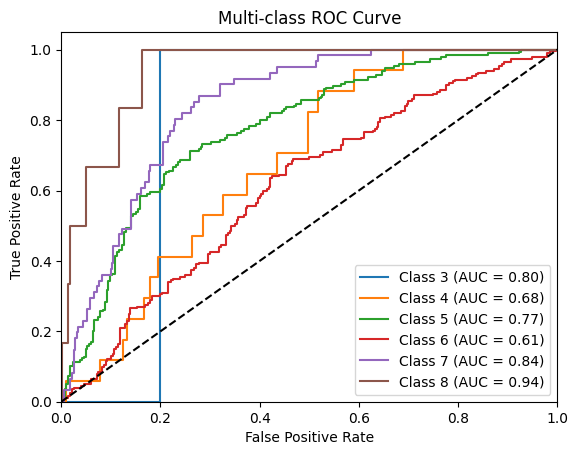

In [20]:
# Plot ROC curve for each class
plt.figure()
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.show()

### **Concrete Compressive Strength Dataset**

In [22]:
# Load the Concrete Compressive Strength Dataset
url_concrete = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
concrete_data = pd.read_excel(url_concrete)

In [23]:
# Explore the data
print(concrete_data.info())
print(concrete_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [24]:
# Check the actual column names
print(concrete_data.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [25]:
# Use the correct column name for the target variable
# Ensure the name matches exactly, including spaces or formatting
target_column = 'Concrete compressive strength(MPa, megapascals) '  # Adjust this based on the output of print(concrete_data.columns)

In [26]:
# Splitting data into features and target
X_concrete = concrete_data.drop(target_column, axis=1)
y_concrete = concrete_data[target_column]

In [28]:
# Splitting dataset into train and test sets
X_train_concrete, X_test_concrete, y_train_concrete, y_test_concrete = train_test_split(X_concrete, y_concrete, test_size=0.3, random_state=42)

In [29]:
# Standardizing the data
scaler = StandardScaler()
X_train_concrete = scaler.fit_transform(X_train_concrete)
X_test_concrete = scaler.transform(X_test_concrete)

In [30]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Construct the SVM regressor
svm_regressor = SVR(kernel='linear')

In [32]:
# Train the model
svm_regressor.fit(X_train_concrete, y_train_concrete)

SVR(kernel='linear')

In [33]:
# Predict on the test set
y_pred_concrete = svm_regressor.predict(X_test_concrete)

In [34]:
# Calculate metrics
mse = mean_squared_error(y_test_concrete, y_pred_concrete)
r2 = r2_score(y_test_concrete, y_pred_concrete)

In [35]:
# Print the regression metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 123.0095
R-squared: 0.5454


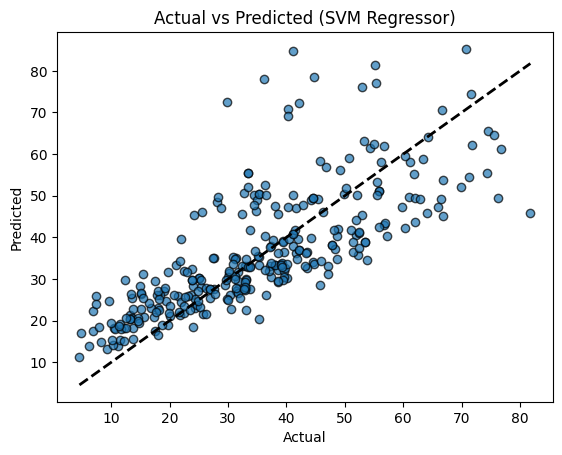

In [36]:
# Plotting actual vs predicted values
plt.figure()
plt.scatter(y_test_concrete, y_pred_concrete, edgecolor='k', alpha=0.7)
plt.plot([y_test_concrete.min(), y_test_concrete.max()], [y_test_concrete.min(), y_test_concrete.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (SVM Regressor)')
plt.show()